In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as BS
import re
import time
import random
import numpy as np
from matplotlib.lines import Line2D

In [2]:
the_final_list = pd.read_csv('../data/the_final_list.csv')
the_final_list

,Unnamed: 0.2,Unnamed: 0.1,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,Book_Title,Director,imdb_rating,rating_count,metacritic_rating,awards,budget,world_wide_gross,currency,budget_currency
0,0,0,tt0120824,movie,The Shipping News,The Shipping News,0,2001,\N,111,...,The Shipping News,Lasse Hallström,6.7,35K,47.0,2 wins & 13 nominations total,38000000.0,24690441.0,$,$
1,1,1,tt0159365,movie,Cold Mountain,Cold Mountain,0,2003,\N,154,...,Cold Mountain,Anthony Minghella,7.2,163K,73.0,20 wins & 101 nominations total,79000000.0,173013509.0,$,$
2,2,2,tt0163025,movie,Jurassic Park Iii,Jurassic Park III,0,2001,\N,92,...,Jurassic Park,Joe Johnston,6.0,365K,42.0,5 wins & 16 nominations total,93000000.0,368780809.0,$,$
3,3,3,tt0164184,movie,The Sum Of All Fears,The Sum of All Fears,0,2002,\N,124,...,The Sum Of All Fears,Phil Alden Robinson,6.5,133K,45.0,2 wins & 5 nominations total,68000000.0,193921372.0,$,$
4,4,4,tt0164334,movie,Along Came A Spider,Along Came a Spider,0,2001,\N,104,...,Along Came A Spider,Lee Tamahori,6.4,103K,42.0,1 win & 1 nomination total,60000000.0,105178561.0,$,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,127,127,tt6977240,movie,Starship Troopers: Traitor Of Mars,Starship Troopers: Traitor of Mars,0,2017,\N,88,...,Starship Troopers,Shinji Aramaki,5.5,6.9K,NaN,1 nomination total,NaN,NaN,NaN,NaN
128,128,128,tt7395114,movie,The Devil All The Time,The Devil All the Time,0,2020,\N,138,...,The Devil All The Time,Antonio Campos,7.1,166K,55.0,3 nominations total,NaN,NaN,NaN,NaN
129,129,129,tt7504726,movie,The Call Of The Wild,The Call of the Wild,0,2020,\N,100,...,The Call Of The Wild,Chris Sanders,6.7,63K,48.0,1 win & 8 nominations total,135000000.0,111166669.0,$,$
130,130,130,tt7657566,movie,Death On The Nile,Death on the Nile,0,2022,\N,127,...,Death On The Nile,Kenneth Branagh,6.3,207K,52.0,1 win & 8 nominations total,90000000.0,137307235.0,$,$


In [3]:
the_final_list = the_final_list.drop(columns=['Unnamed: 0.2', 'Unnamed: 0.1'])
the_final_list

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Film_Title,...,Book_Title,Director,imdb_rating,rating_count,metacritic_rating,awards,budget,world_wide_gross,currency,budget_currency
0,tt0120824,movie,The Shipping News,The Shipping News,0,2001,\N,111,Drama,The Shipping News,...,The Shipping News,Lasse Hallström,6.7,35K,47.0,2 wins & 13 nominations total,38000000.0,24690441.0,$,$
1,tt0159365,movie,Cold Mountain,Cold Mountain,0,2003,\N,154,"Adventure,Drama,Romance",Cold Mountain,...,Cold Mountain,Anthony Minghella,7.2,163K,73.0,20 wins & 101 nominations total,79000000.0,173013509.0,$,$
2,tt0163025,movie,Jurassic Park Iii,Jurassic Park III,0,2001,\N,92,"Action,Adventure,Sci-Fi",Jurassic Park Iii,...,Jurassic Park,Joe Johnston,6.0,365K,42.0,5 wins & 16 nominations total,93000000.0,368780809.0,$,$
3,tt0164184,movie,The Sum Of All Fears,The Sum of All Fears,0,2002,\N,124,"Action,Drama,Thriller",The Sum Of All Fears,...,The Sum Of All Fears,Phil Alden Robinson,6.5,133K,45.0,2 wins & 5 nominations total,68000000.0,193921372.0,$,$
4,tt0164334,movie,Along Came A Spider,Along Came a Spider,0,2001,\N,104,"Crime,Drama,Mystery",Along Came A Spider,...,Along Came A Spider,Lee Tamahori,6.4,103K,42.0,1 win & 1 nomination total,60000000.0,105178561.0,$,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,tt6977240,movie,Starship Troopers: Traitor Of Mars,Starship Troopers: Traitor of Mars,0,2017,\N,88,"Action,Animation,Fantasy",Starship Troopers: Traitor Of Mars,...,Starship Troopers,Shinji Aramaki,5.5,6.9K,NaN,1 nomination total,NaN,NaN,NaN,NaN
128,tt7395114,movie,The Devil All The Time,The Devil All the Time,0,2020,\N,138,"Crime,Drama,Thriller",The Devil All The Time,...,The Devil All The Time,Antonio Campos,7.1,166K,55.0,3 nominations total,NaN,NaN,NaN,NaN
129,tt7504726,movie,The Call Of The Wild,The Call of the Wild,0,2020,\N,100,"Adventure,Drama,Family",The Call Of The Wild,...,The Call Of The Wild,Chris Sanders,6.7,63K,48.0,1 win & 8 nominations total,135000000.0,111166669.0,$,$
130,tt7657566,movie,Death On The Nile,Death on the Nile,0,2022,\N,127,"Crime,Drama,Mystery",Death On The Nile,...,Death On The Nile,Kenneth Branagh,6.3,207K,52.0,1 win & 8 nominations total,90000000.0,137307235.0,$,$


In [6]:
the_final_list.columns

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres', 'Film_Title',
       'Release_Date', 'Unnamed: 0', 'goodreads_book_id', 'best_book_id',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'average_rating', 'ratings_count', 'image_url',
       'small_image_url', 'Author', 'Publication_Date', 'Book_Title_Cleaned',
       'Book_Title', 'Director', 'imdb_rating', 'rating_count',
       'metacritic_rating', 'awards', 'budget', 'world_wide_gross', 'currency',
       'budget_currency'],
      dtype='object')

In [5]:
the_final_list.groupby('startYear').originalTitle.count()

startYear
2001     6
2002    12
2003    11
2004    10
2005     9
2006     8
2007     5
2008     8
2009     5
2010     9
2011     6
2012     4
2013     7
2014     2
2015     4
2016     4
2017     2
2018     4
2019     2
2020     4
2021     1
2022     2
2023     4
2024     2
2026     1
Name: originalTitle, dtype: int64

In [7]:
the_final_list.groupby('Publication_Date').originalTitle.count()

Publication_Date
1813    1
1876    2
1877    1
1880    1
1889    1
1894    3
1903    2
1904    1
1912    3
1915    1
1925    3
1927    1
1937    1
1945    1
1946    1
1947    1
1950    3
1952    1
1953    2
1954    2
1955    1
1959    3
1961    1
1962    2
1965    2
1966    1
1968    1
1971    3
1972    1
1974    2
1977    3
1980    1
1981    1
1982    2
1983    2
1987    2
1988    1
1990    3
1991    1
1992    2
1993    2
1995    1
1996    3
1997    1
1998    5
1999    6
2000    4
2001    7
2002    3
2003    5
2005    7
2006    5
2007    2
2008    8
2009    1
2010    1
2011    1
2012    1
2013    1
2016    1
Name: originalTitle, dtype: int64

In [8]:
the_final_list.Publication_Date.nunique()

60

In [10]:
the_final_list.groupby('Book_Title').originalTitle.count().sort_values()

Book_Title
A Connecticut Yankee In King Arthur'S Court    1
A Painted House                                1
A Scanner Darkly                               1
A Walk To Remember                             1
A Widow For One Year                           1
                                              ..
The Exorcist                                   3
The Jungle Books                               3
The Chronicles Of Narnia                       3
Twilight                                       3
The Hunger Games                               6
Name: originalTitle, Length: 106, dtype: int64

In [109]:
small_list = the_final_list[['Book_Title_Cleaned', 'Author', 'Publication_Date', 'average_rating', 'Film_Title', 'Director', 'Release_Date', 'imdb_rating', 'metacritic_rating', 'budget', 'budget_currency', 'world_wide_gross', 'currency']]
small_list

,Book_Title_Cleaned,Author,Publication_Date,average_rating,Film_Title,Director,Release_Date,imdb_rating,metacritic_rating,budget,budget_currency,world_wide_gross,currency
0,The Shipping News,Annie Proulx,1993,3.83,The Shipping News,Lasse Hallström,2001,6.7,47.0,38000000.0,$,24690441.0,$
1,Cold Mountain,Charles Frazier,1997,3.83,Cold Mountain,Anthony Minghella,2003,7.2,73.0,79000000.0,$,173013509.0,$
2,Jurassic Park,Michael Crichton,1990,3.96,Jurassic Park Iii,Joe Johnston,2001,6.0,42.0,93000000.0,$,368780809.0,$
3,The Sum Of All Fears,Tom Clancy,1991,3.99,The Sum Of All Fears,Phil Alden Robinson,2002,6.5,45.0,68000000.0,$,193921372.0,$
4,Along Came A Spider,James Patterson,1993,4.08,Along Came A Spider,Lee Tamahori,2001,6.4,42.0,60000000.0,$,105178561.0,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Starship Troopers,Robert A. Heinlein,1959,3.99,Starship Troopers: Traitor Of Mars,Shinji Aramaki,2017,5.5,NaN,NaN,NaN,NaN,NaN
128,The Devil All The Time,Donald Ray Pollock,2011,4.09,The Devil All The Time,Antonio Campos,2020,7.1,55.0,NaN,NaN,NaN,NaN
129,The Call Of The Wild,Jack London,1903,3.83,The Call Of The Wild,Chris Sanders,2020,6.7,48.0,135000000.0,$,111166669.0,$
130,Death On The Nile,Agatha Christie,1937,4.06,Death On The Nile,Kenneth Branagh,2022,6.3,52.0,90000000.0,$,137307235.0,$


In [110]:
small_list = small_list[small_list.Release_Date <= 2025]
small_list

,Book_Title_Cleaned,Author,Publication_Date,average_rating,Film_Title,Director,Release_Date,imdb_rating,metacritic_rating,budget,budget_currency,world_wide_gross,currency
0,The Shipping News,Annie Proulx,1993,3.83,The Shipping News,Lasse Hallström,2001,6.7,47.0,38000000.0,$,24690441.0,$
1,Cold Mountain,Charles Frazier,1997,3.83,Cold Mountain,Anthony Minghella,2003,7.2,73.0,79000000.0,$,173013509.0,$
2,Jurassic Park,Michael Crichton,1990,3.96,Jurassic Park Iii,Joe Johnston,2001,6.0,42.0,93000000.0,$,368780809.0,$
3,The Sum Of All Fears,Tom Clancy,1991,3.99,The Sum Of All Fears,Phil Alden Robinson,2002,6.5,45.0,68000000.0,$,193921372.0,$
4,Along Came A Spider,James Patterson,1993,4.08,Along Came A Spider,Lee Tamahori,2001,6.4,42.0,60000000.0,$,105178561.0,$
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Starship Troopers,Robert A. Heinlein,1959,3.99,Starship Troopers: Traitor Of Mars,Shinji Aramaki,2017,5.5,NaN,NaN,NaN,NaN,NaN
128,The Devil All The Time,Donald Ray Pollock,2011,4.09,The Devil All The Time,Antonio Campos,2020,7.1,55.0,NaN,NaN,NaN,NaN
129,The Call Of The Wild,Jack London,1903,3.83,The Call Of The Wild,Chris Sanders,2020,6.7,48.0,135000000.0,$,111166669.0,$
130,Death On The Nile,Agatha Christie,1937,4.06,Death On The Nile,Kenneth Branagh,2022,6.3,52.0,90000000.0,$,137307235.0,$


In [13]:
def currency_converter(money):
    if money == '$':
        return 1.0
    elif money == '£':
        return 1.35
    elif money == '€':
        return 1.17

In [14]:
small_list[small_list.budget_currency != small_list.currency]

,Book_Title_Cleaned,Author,Publication_Date,average_rating,Film_Title,Release_Date,imdb_rating,metacritic_rating,budget,budget_currency,world_wide_gross,currency
8,Tales Of The South Pacific,James A. Michener,1947,4.03,South Pacific,2001,5.7,NaN,15000000.0,$,NaN,NaN
17,A Wrinkle In Time,Madeleine L'Engle,1962,4.04,A Wrinkle In Time,2003,5.6,NaN,NaN,NaN,NaN,NaN
18,The Great Gatsby,F. Scott Fitzgerald,1925,3.89,G,2002,5.2,42.0,NaN,NaN,3020784.0,$
19,The Rules Of Attraction,Bret Easton Ellis,1987,3.71,The Rules Of Attraction,2002,NaN,NaN,NaN,NaN,NaN,NaN
26,Carrie,Stephen King,1974,3.93,Carrie,2002,5.4,NaN,NaN,NaN,NaN,NaN
34,The Other Boleyn Girl,Philippa Gregory,2001,4.04,The Other Boleyn Girl,2003,6.1,NaN,NaN,NaN,NaN,NaN
35,Fahrenheit 451,Ray Bradbury,1953,3.97,Fahrenheit 451,2018,5.0,NaN,NaN,NaN,NaN,NaN
36,A Painted House,John Grisham,2001,3.67,A Painted House,2003,6.5,NaN,NaN,NaN,NaN,NaN
47,Back When We Were Grownups,Anne Tyler,2001,3.51,Back When We Were Grownups,2004,6.1,NaN,NaN,NaN,NaN,NaN
51,The Five People You Meet In Heaven,Mitch Albom,2003,3.90,The Five People You Meet In Heaven,2004,7.2,NaN,20000000.0,$,NaN,NaN


In [15]:
small_list.groupby('currency').Film_Title.count()

currency
$    111
Name: Film_Title, dtype: int64

In [16]:
small_list.groupby('budget_currency').Film_Title.count()

budget_currency
$    107
£      1
€      1
Name: Film_Title, dtype: int64

In [17]:
small_list.groupby('Release_Date').world_wide_gross.sum()

Release_Date
2001    8.903183e+08
2002    8.526360e+08
2003    8.189226e+08
2004    6.361008e+08
2005    1.161667e+09
2006    1.837847e+09
2007    1.273006e+09
2008    1.071656e+09
2009    1.393302e+09
2010    2.082909e+09
2011    7.876774e+08
2012    1.403788e+09
2013    1.706171e+09
2014    7.588463e+08
2015    2.345538e+09
2016    1.420352e+09
2017    6.892818e+07
2018    1.441242e+09
2019    1.855035e+08
2020    1.238350e+08
2021    4.106685e+08
2022    1.523465e+08
2023    5.670049e+08
2024    7.153040e+08
2026    0.000000e+00
Name: world_wide_gross, dtype: float64

<Axes: xlabel='Release_Date'>

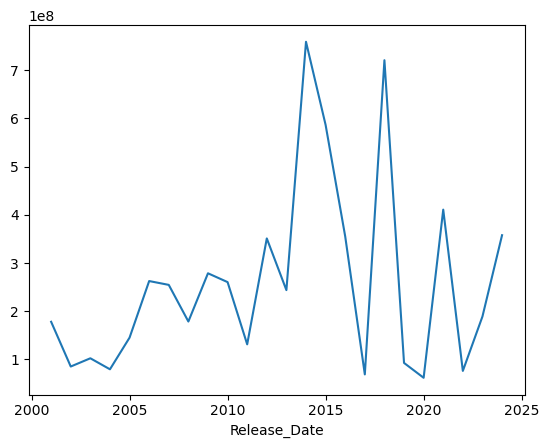

In [35]:
small_list.groupby('Release_Date').world_wide_gross.mean().plot(kind='line')

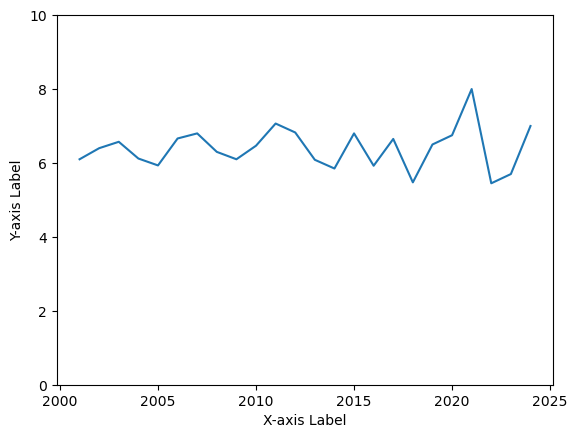

In [29]:
ax = small_list.groupby('Release_Date').imdb_rating.mean().plot(kind='line')

ax.set_ylim(0, 10)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

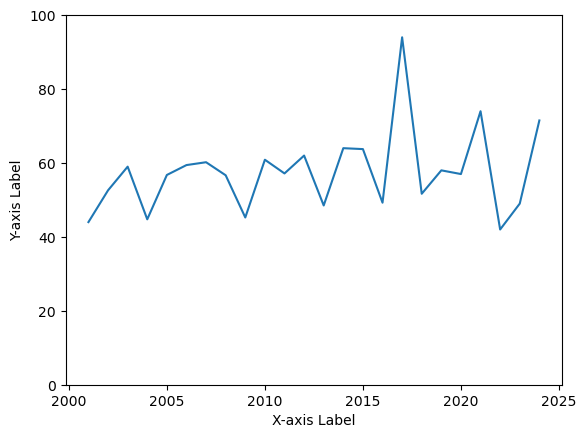

In [30]:
ax = small_list.groupby('Release_Date').metacritic_rating.mean().plot(kind='line')

ax.set_ylim(0, 100)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

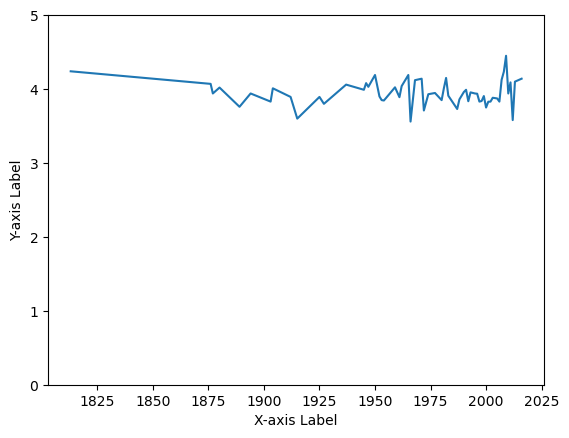

In [201]:
ax = small_list.groupby('Publication_Date').average_rating.mean().plot(kind='line')

ax.set_ylim(0, 5)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

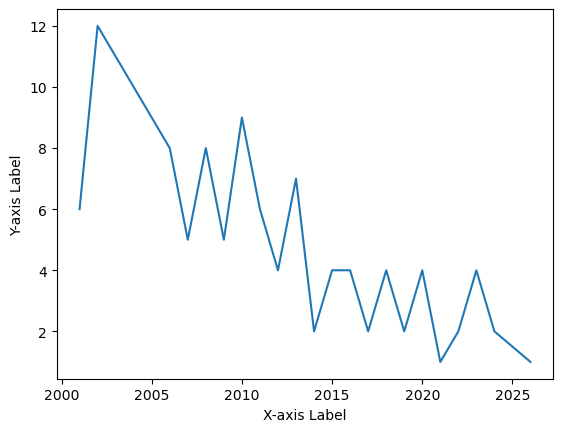

In [34]:
ax = small_list.groupby('Release_Date').Film_Title.count().plot(kind='line')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

In [36]:
small_list.dtypes

Book_Title_Cleaned     object
Author                 object
Publication_Date        int64
average_rating        float64
Film_Title             object
Release_Date            int64
imdb_rating           float64
metacritic_rating     float64
budget                float64
budget_currency        object
world_wide_gross      float64
currency               object
dtype: object

In [124]:
small_list['time_to_adapt'] = small_list.Release_Date - small_list.Publication_Date

C:\Users\erics\AppData\Local\Temp\ipykernel_33712\288708409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_list['time_to_adapt'] = small_list.Release_Date - small_list.Publication_Date


In [125]:
small_list['imdb_book_diff'] = small_list.imdb_rating - small_list.average_rating*2
small_list['metacritic_book_diff'] = small_list.metacritic_rating/10 - small_list.average_rating*2
small_list

C:\Users\erics\AppData\Local\Temp\ipykernel_33712\1925705820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_list['imdb_book_diff'] = small_list.imdb_rating - small_list.average_rating*2
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\1925705820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_list['metacritic_book_diff'] = small_list.metacritic_rating/10 - small_list.average_rating*2


,Book_Title_Cleaned,Author,Publication_Date,average_rating,Film_Title,Director,Release_Date,imdb_rating,metacritic_rating,budget,budget_currency,world_wide_gross,currency,time_to_adapt,imdb_book_diff,metacritic_book_diff
0,The Shipping News,Annie Proulx,1993,3.83,The Shipping News,Lasse Hallström,2001,6.7,47.0,38000000.0,$,24690441.0,$,8,-0.96,-2.96
1,Cold Mountain,Charles Frazier,1997,3.83,Cold Mountain,Anthony Minghella,2003,7.2,73.0,79000000.0,$,173013509.0,$,6,-0.46,-0.36
2,Jurassic Park,Michael Crichton,1990,3.96,Jurassic Park Iii,Joe Johnston,2001,6.0,42.0,93000000.0,$,368780809.0,$,11,-1.92,-3.72
3,The Sum Of All Fears,Tom Clancy,1991,3.99,The Sum Of All Fears,Phil Alden Robinson,2002,6.5,45.0,68000000.0,$,193921372.0,$,11,-1.48,-3.48
4,Along Came A Spider,James Patterson,1993,4.08,Along Came A Spider,Lee Tamahori,2001,6.4,42.0,60000000.0,$,105178561.0,$,8,-1.76,-3.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Starship Troopers,Robert A. Heinlein,1959,3.99,Starship Troopers: Traitor Of Mars,Shinji Aramaki,2017,5.5,NaN,NaN,NaN,NaN,NaN,58,-2.48,NaN
128,The Devil All The Time,Donald Ray Pollock,2011,4.09,The Devil All The Time,Antonio Campos,2020,7.1,55.0,NaN,NaN,NaN,NaN,9,-1.08,-2.68
129,The Call Of The Wild,Jack London,1903,3.83,The Call Of The Wild,Chris Sanders,2020,6.7,48.0,135000000.0,$,111166669.0,$,117,-0.96,-2.86
130,Death On The Nile,Agatha Christie,1937,4.06,Death On The Nile,Kenneth Branagh,2022,6.3,52.0,90000000.0,$,137307235.0,$,85,-1.82,-2.92


In [39]:
color_palette = {'background': '#4a4a4a', 
                 'imdb': '#f5c518', 
                 'goodreads': '#e9e5cd', 
                 'gross': '#7FB184', 
                 'lines': '#FFFFFF'}

In [43]:
color_palette['background']

'#4a4a4a'

In [62]:
gross_time = small_list.groupby('Release_Date', as_index=False).world_wide_gross.mean()
gross_time

,Release_Date,world_wide_gross
0,2001,1.780637e+08
1,2002,8.526360e+07
2,2003,1.023653e+08
3,2004,7.951260e+07
4,2005,1.452083e+08
5,2006,2.625495e+08
6,2007,2.546013e+08
7,2008,1.786093e+08
8,2009,2.786604e+08
9,2010,2.603636e+08


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\993881596.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 14)
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\993881596.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


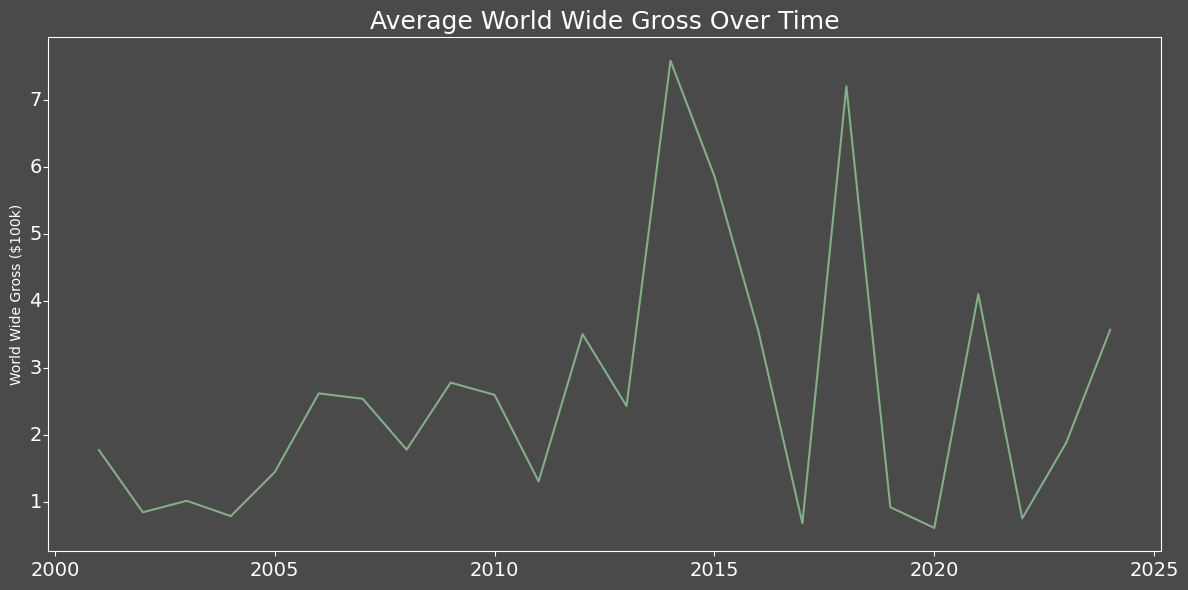

In [182]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
gross_time.plot(x='Release_Date', y='world_wide_gross', kind = 'line', color = color_palette['gross'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average World Wide Gross Over Time', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('')
plt.ylabel('World Wide Gross ($100k)', color =  color_palette['lines'])
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=10, color =  color_palette['lines'], labelcolor=color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_World_Wide_Gross_Over_Time.png", dpi=300, bbox_inches='tight')

In [67]:
imdb_time = small_list.groupby('Release_Date', as_index=False).imdb_rating.mean()
imdb_time

,Release_Date,imdb_rating
0,2001,6.100000
1,2002,6.400000
2,2003,6.572727
3,2004,6.120000
4,2005,5.933333
5,2006,6.662500
6,2007,6.800000
7,2008,6.300000
8,2009,6.100000
9,2010,6.466667


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\203482174.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\203482174.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


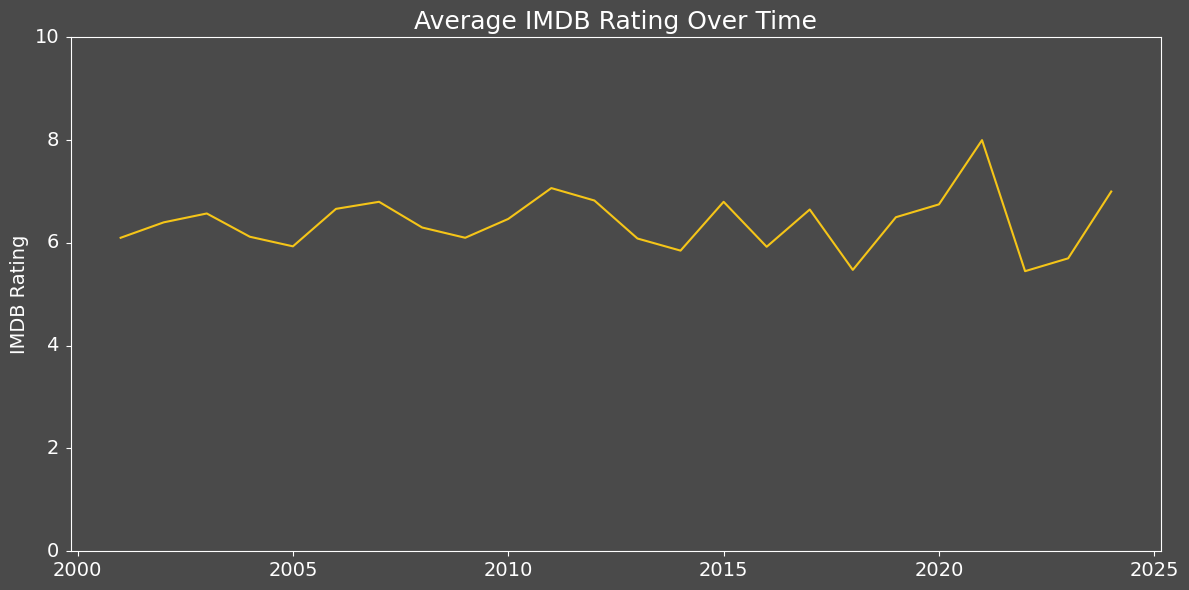

In [183]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
imdb_time.plot(x='Release_Date', y='imdb_rating', kind = 'line', color = color_palette['imdb'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average IMDB Rating Over Time', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('')
ax.set_ylim(0, 10)
plt.ylabel('IMDB Rating', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'], labelcolor=color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_IMDB_Rating_Over_Time.png", dpi=300, bbox_inches='tight')

In [76]:
metacritic_time = small_list.groupby('Release_Date', as_index=False).metacritic_rating.mean()
metacritic_time.metacritic_rating = metacritic_time.metacritic_rating/10
metacritic_time

,Release_Date,metacritic_rating
0,2001,4.400000
1,2002,5.260000
2,2003,5.900000
3,2004,4.475000
4,2005,5.675000
5,2006,5.942857
6,2007,6.020000
7,2008,5.666667
8,2009,4.525000
9,2010,6.087500


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\2128432701.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\2128432701.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


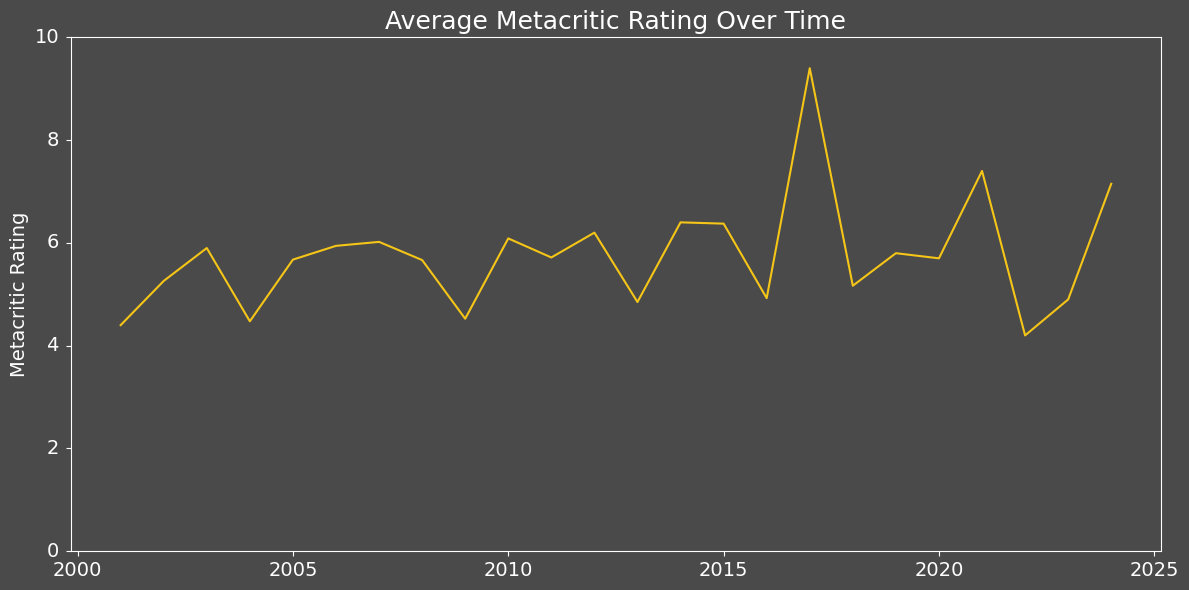

In [184]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
metacritic_time.plot(x='Release_Date', y='metacritic_rating', kind = 'line', color = color_palette['imdb'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average Metacritic Rating Over Time', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('')
ax.set_ylim(0, 10)
plt.ylabel('Metacritic Rating', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'], labelcolor=color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_Metacritic_Rating_Over_Time.png", dpi=300, bbox_inches='tight')

In [159]:
goodreads_time = small_list.groupby('Publication_Date', as_index=False).average_rating.mean()
goodreads_time.average_rating = goodreads_time.average_rating*2
goodreads_time

,Publication_Date,average_rating
0,1813,8.480000
1,1876,8.140000
2,1877,7.880000
3,1880,8.040000
4,1889,7.520000
5,1894,7.880000
6,1903,7.660000
7,1904,8.020000
8,1912,7.786667
9,1915,7.200000


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\836054032.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\836054032.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


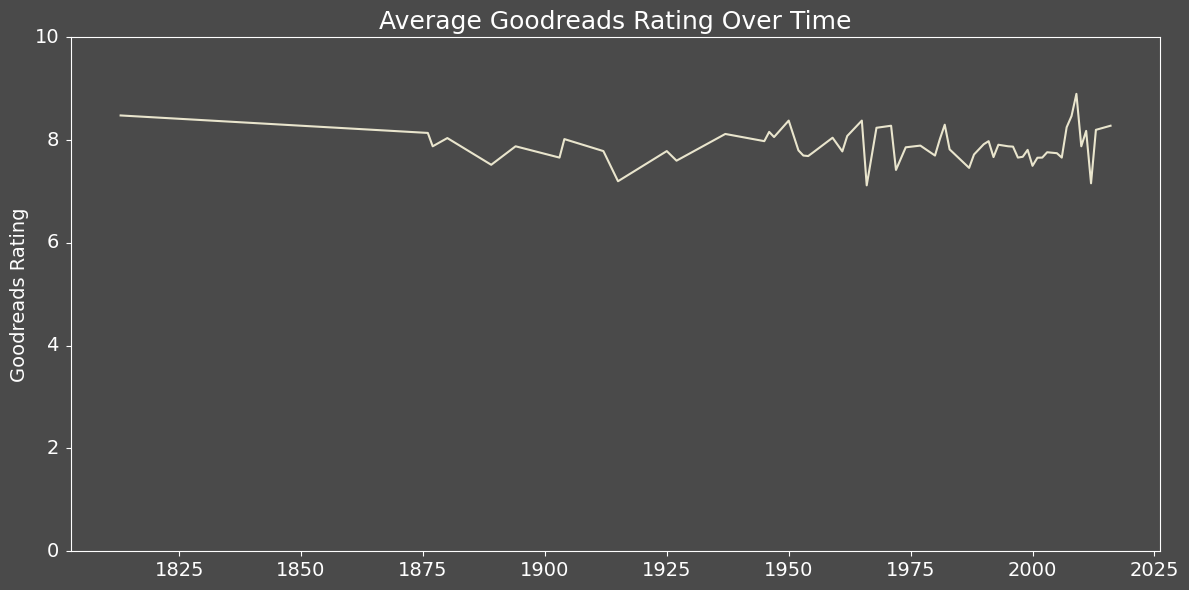

In [232]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
goodreads_time.plot(x='Publication_Date', y='average_rating', kind = 'line', color = color_palette['goodreads'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average Goodreads Rating Over Time', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('')
ax.set_ylim(0, 10)
plt.ylabel('Goodreads Rating', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'], labelcolor=color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_Goodreads_Rating_Over_Time.png", dpi=300, bbox_inches='tight')

In [223]:
ratings_time = small_list.groupby('Publication_Date', as_index=False)[['average_rating', 'imdb_rating']].mean()
ratings_time.average_rating = ratings_time.average_rating*2
ratings_time

,Publication_Date,average_rating,imdb_rating
0,1813,8.480000,7.800000
1,1876,8.140000,5.550000
2,1877,7.880000,6.400000
3,1880,8.040000,5.700000
4,1889,7.520000,5.000000
5,1894,7.880000,6.366667
6,1903,7.660000,6.000000
7,1904,8.020000,5.400000
8,1912,7.786667,4.500000
9,1915,7.200000,6.400000


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3895307572.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3895307572.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


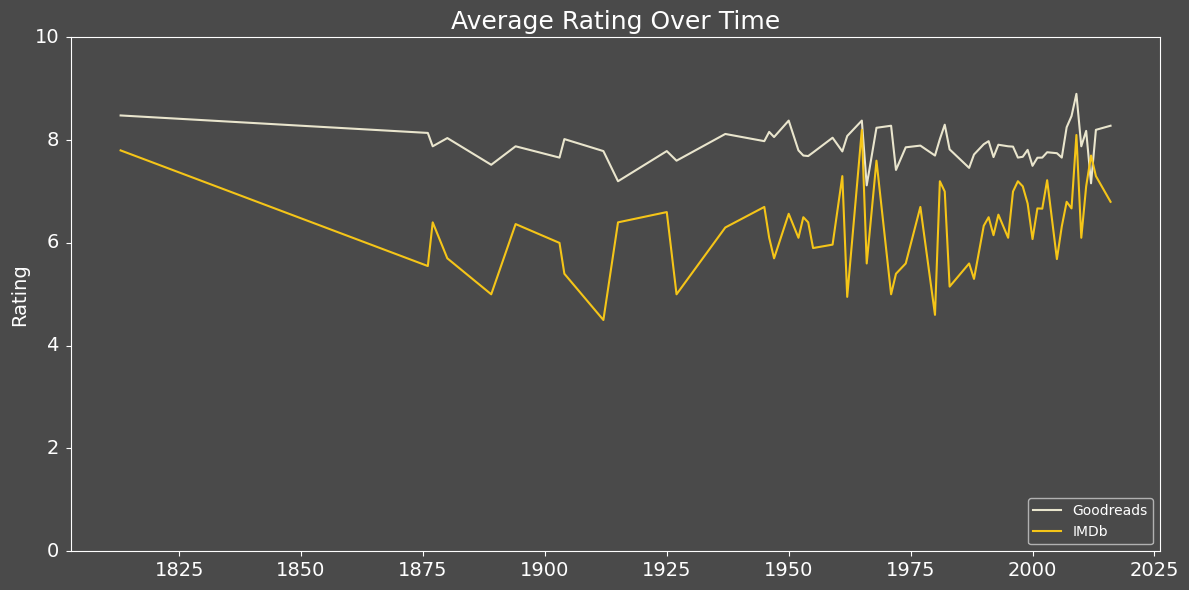

In [233]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
ratings_time.plot(x='Publication_Date', y=['average_rating', 'imdb_rating'], kind = 'line', color = [color_palette['goodreads'], color_palette['imdb']], figsize=(12, 6), ax=ax)
plt.title('Average Rating Over Time', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.legend(loc='lower right', facecolor=color_palette['background'], labelcolor=color_palette['lines'], labels=['Goodreads', 'IMDb'])
plt.xlabel('')
ax.set_ylim(0, 10)
plt.ylabel('Rating', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'], labelcolor=color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_Rating_Over_Time.png", dpi=300, bbox_inches='tight')

In [83]:
books_count = small_list.groupby('Release_Date', as_index=False).Film_Title.count()
books_count

,Release_Date,Film_Title
0,2001,6
1,2002,12
2,2003,11
3,2004,10
4,2005,9
5,2006,8
6,2007,5
7,2008,8
8,2009,5
9,2010,9


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3851627869.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3851627869.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


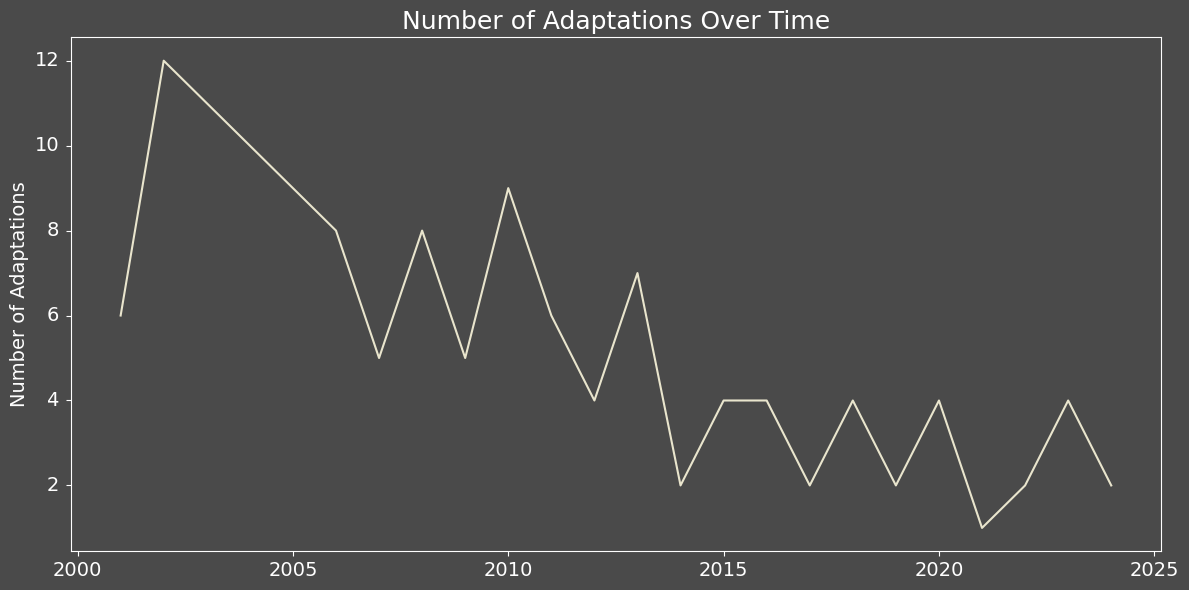

In [187]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
books_count.plot(x='Release_Date', y='Film_Title', kind = 'line', color = color_palette['goodreads'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Number of Adaptations Over Time', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('')
plt.ylabel('Number of Adaptations', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'], labelcolor=color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Number_of_Adaptations_Over_Time.png", dpi=300, bbox_inches='tight')

In [126]:
time_to_adapt = small_list.groupby('time_to_adapt', as_index=False).Film_Title.count()
time_to_adapt

,time_to_adapt,Film_Title
0,1,2
1,2,5
2,3,10
3,4,12
4,5,9
5,6,9
6,7,5
7,8,5
8,9,2
9,10,2


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3537126136.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3537126136.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


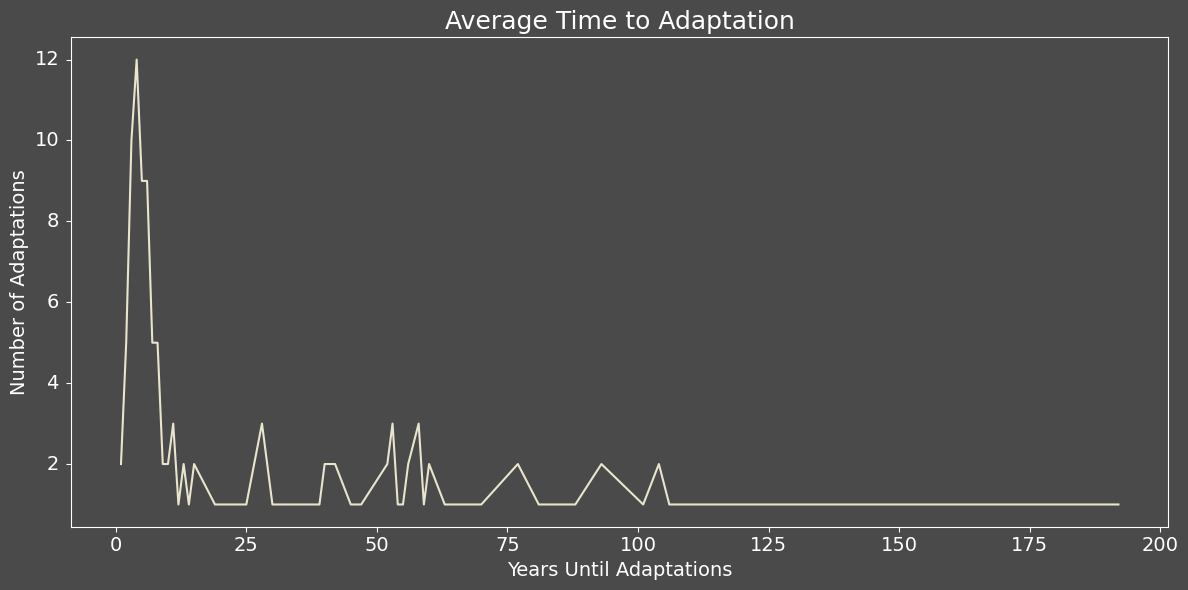

In [186]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
time_to_adapt.plot(x='time_to_adapt', y='Film_Title', kind = 'line', color = color_palette['goodreads'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average Time to Adaptation', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('Years Until Adaptations', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Number of Adaptations', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'], labelcolor=color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_Time_to_Adaptation.png", dpi=300, bbox_inches='tight')

In [90]:
imdb_book_diff = small_list.groupby('Release_Date', as_index=False).imdb_book_diff.mean()
imdb_book_diff

,Release_Date,imdb_book_diff
0,2001,-1.693333
1,2002,-1.461818
2,2003,-1.214545
3,2004,-1.516000
4,2005,-1.940000
5,2006,-0.975000
6,2007,-1.176000
7,2008,-1.477500
8,2009,-1.488000
9,2010,-1.491111


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3502548964.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 12)
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3502548964.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


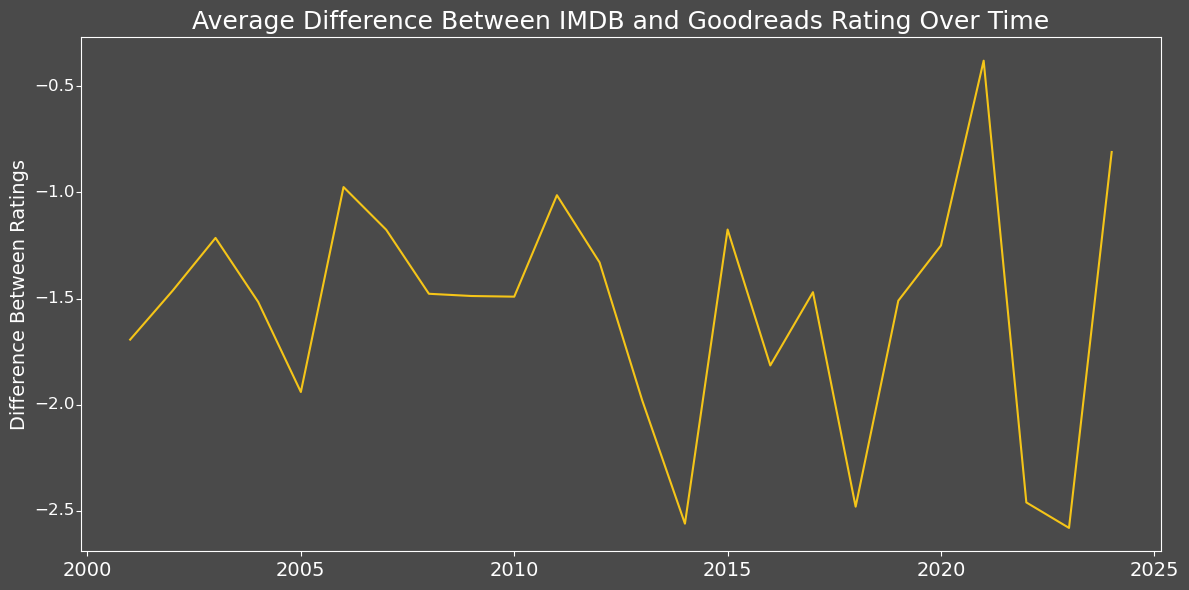

In [188]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
imdb_book_diff.plot(x='Release_Date', y='imdb_book_diff', kind = 'line', color = color_palette['imdb'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average Difference Between IMDB and Goodreads Rating Over Time', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('')
plt.ylabel('Difference Between Ratings', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=30, color =  color_palette['lines'], labelcolor=color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_Difference_Between_IMDB_and_Goodreads_Rating_Over_Time.png", dpi=300, bbox_inches='tight')

In [96]:
metacritic_book_diff = small_list.groupby('Release_Date', as_index=False).metacritic_book_diff.mean()
metacritic_book_diff

,Release_Date,metacritic_book_diff
0,2001,-3.340000
1,2002,-2.602000
2,2003,-1.870000
3,2004,-3.217500
4,2005,-2.202500
5,2006,-1.768571
6,2007,-1.956000
7,2008,-2.166667
8,2009,-3.045000
9,2010,-1.915000


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\1144249938.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 12)
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\1144249938.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


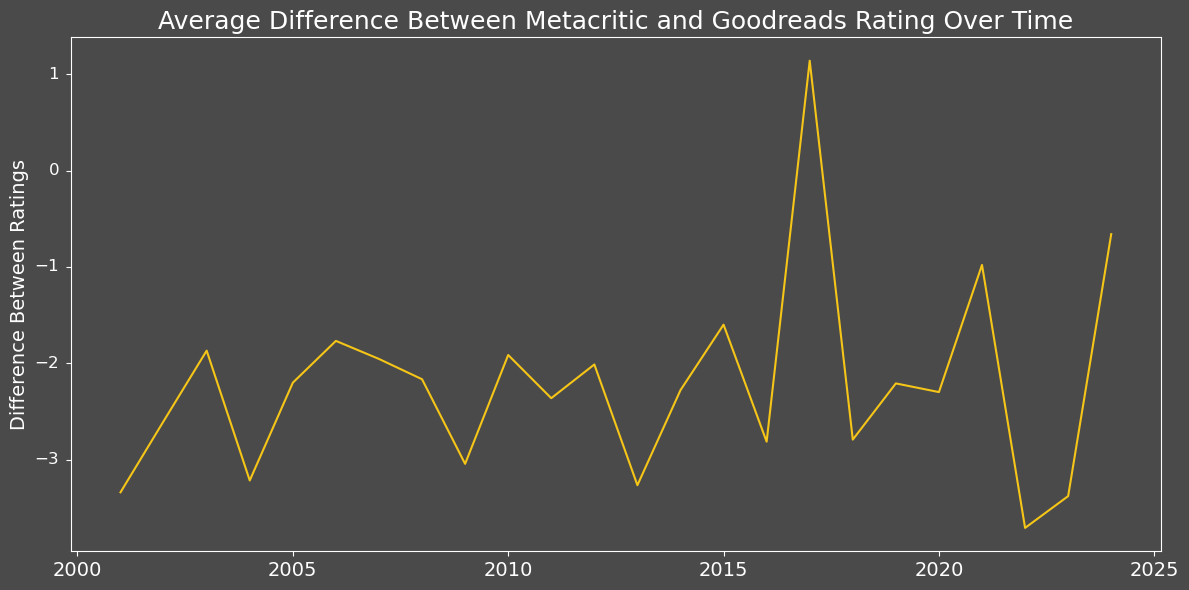

In [189]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
metacritic_book_diff.plot(x='Release_Date', y='metacritic_book_diff', kind = 'line', color = color_palette['imdb'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average Difference Between Metacritic and Goodreads Rating Over Time', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('')
plt.ylabel('Difference Between Ratings', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'], labelcolor=color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_Difference_Between_Metacritic_and_Goodreads_Rating_Over_Time.png", dpi=300, bbox_inches='tight')

In [127]:
director_count = small_list.groupby('Director', as_index=False).Film_Title.count().sort_values(by=['Film_Title'], ascending=False)
director_count

,Director,Film_Title
41,Francis Lawrence,6
26,Chris Weitz,3
66,Lasse Hallström,3
29,Clint Eastwood,2
4,Andrew Adamson,2
...,...,...
106,Steven Spielberg,1
109,Tate Taylor,1
110,Thor Freudenthal,1
111,Tim Burton,1


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\2231384237.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


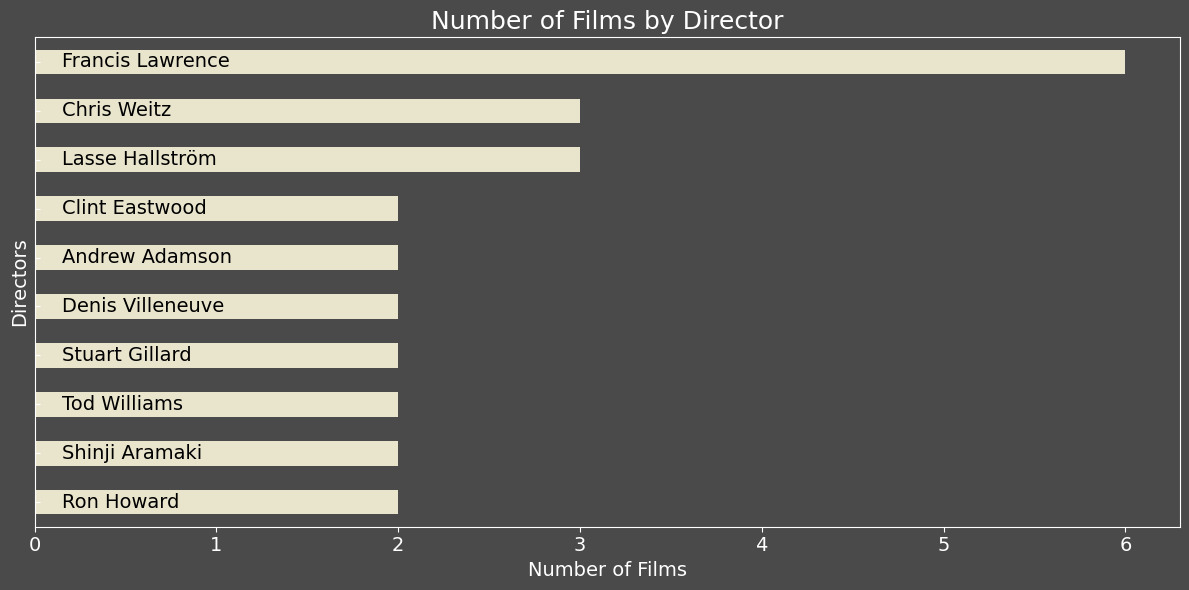

In [190]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
director_count.head(10)[::-1].plot(x='Director', y='Film_Title', kind = 'barh', color = color_palette['goodreads'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Number of Films by Director', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('Number of Films', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Directors', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=-20, direction='in', color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Number_of_Films_by_Director.png", dpi=300, bbox_inches='tight')

In [137]:
director_book = small_list.groupby('Director', as_index=False).average_rating.mean().sort_values(by=['average_rating'], ascending=False)
director_book.average_rating = director_book.average_rating*2
director_book

,Director,average_rating
109,Tate Taylor,8.90
46,Gary Ross,8.68
41,Francis Lawrence,8.50
55,Joe Wright,8.48
24,Chris Columbus,8.46
...,...,...
35,David Slade,7.14
19,Brendan Maher,7.12
102,Scott McGehee,7.10
99,Ron Underwood,7.02


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\903105290.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


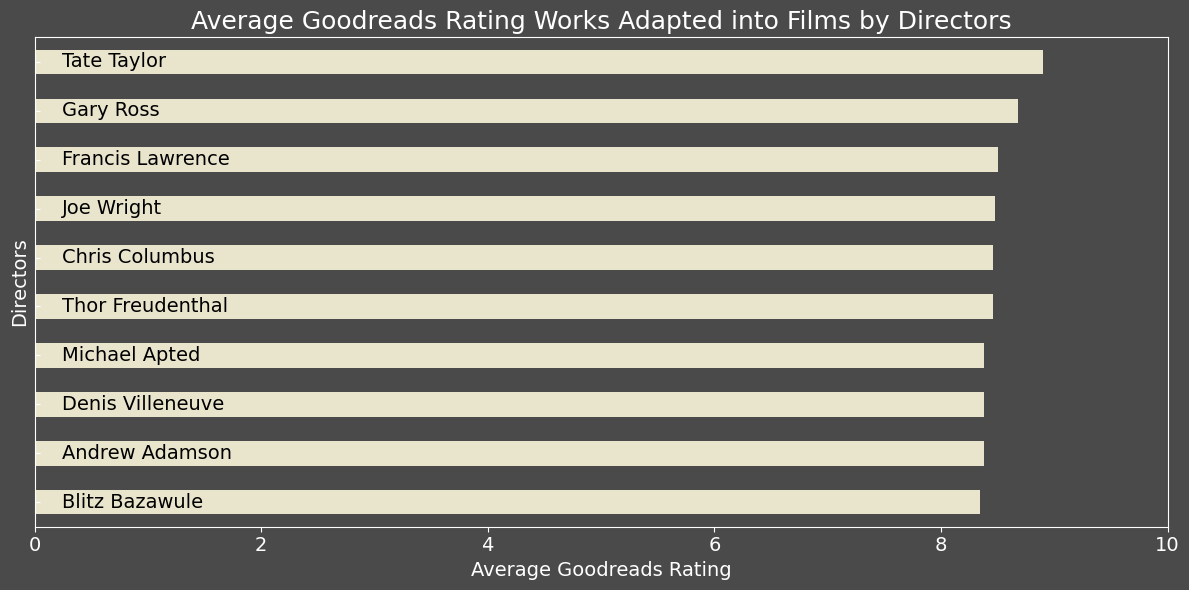

In [191]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
director_book.head(10)[::-1].plot(x='Director', y='average_rating', kind = 'barh', color = color_palette['goodreads'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average Goodreads Rating Works Adapted into Films by Directors', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
ax.set_xlim(0, 10)
plt.xlabel('Average Goodreads Rating', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Directors', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=-20, direction='in', color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_Goodreads_Rating_Works_Adapted_into_Films_by_Directors.png", dpi=300, bbox_inches='tight')

In [139]:
director_imdb = small_list.groupby('Director', as_index=False).imdb_rating.mean().sort_values(by=['imdb_rating'], ascending=False)
director_imdb

,Director,imdb_rating
38,Denis Villeneuve,8.20
73,Martin Scorsese,8.20
109,Tate Taylor,8.10
72,Martin Campbell,8.00
111,Tim Burton,7.90
...,...,...
34,David Gordon Green,4.80
69,Lindsey Anderson Beer,4.60
62,Keith Thomas,4.60
12,Ava DuVernay,4.30


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3252955812.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


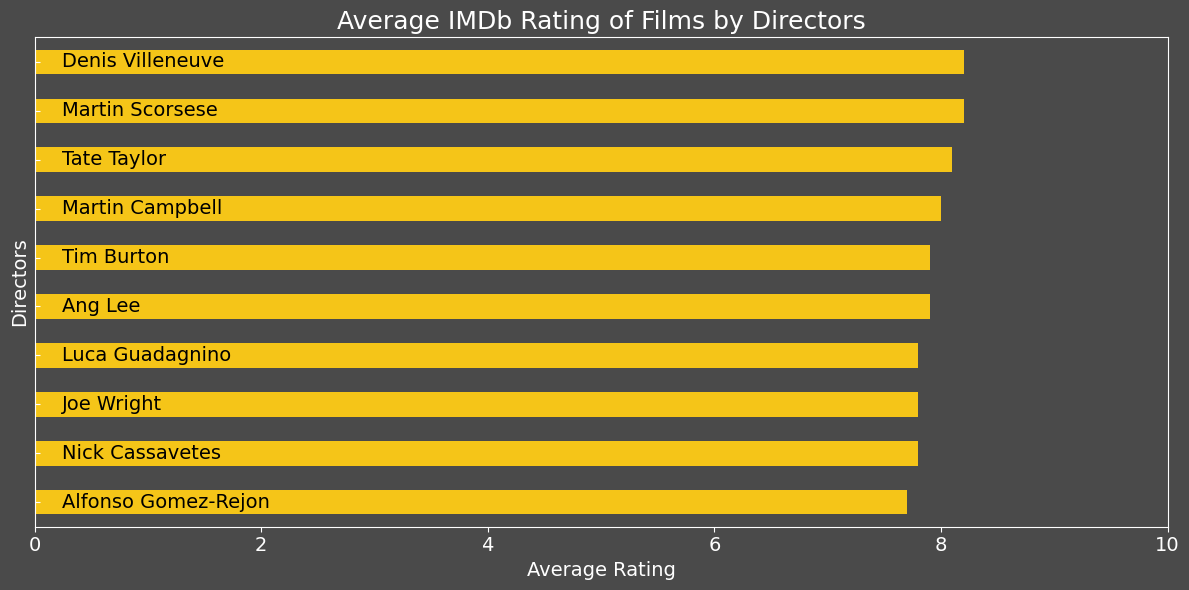

In [234]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
director_imdb.head(10)[::-1].plot(x='Director', y='imdb_rating', kind = 'barh', color = color_palette['imdb'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average IMDb Rating of Films by Directors', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
ax.set_xlim(0, 10)
plt.xlabel('Average Rating', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Directors', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=-20, direction='in', color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_IMDB_Rating_of_Films_by_Directors.png", dpi=300, bbox_inches='tight')

In [143]:
director_diff = small_list.groupby('Director', as_index=False).imdb_book_diff.mean().sort_values(by=['imdb_book_diff'], ascending=False)
director_diff

,Director,imdb_book_diff
111,Tim Burton,0.62
3,Alfonso Gomez-Rejon,0.54
72,Martin Campbell,0.54
8,Ang Lee,0.14
73,Martin Scorsese,0.06
...,...,...
83,Paul Schrader,-3.18
69,Lindsey Anderson Beer,-3.22
34,David Gordon Green,-3.48
108,Stuart Gillard,-3.67


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3616168043.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


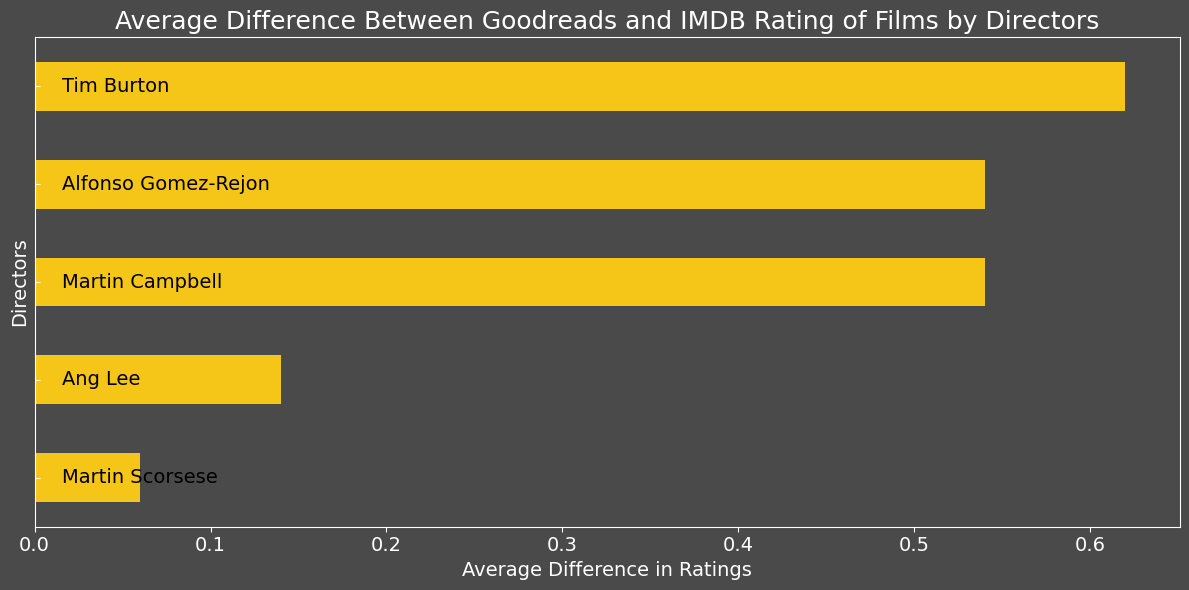

In [195]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
director_diff.head(5)[::-1].plot(x='Director', y='imdb_book_diff', kind = 'barh', color = color_palette['imdb'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average Difference Between Goodreads and IMDB Rating of Films by Directors', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('Average Difference in Ratings', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Directors', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=-20, direction='in', color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_Difference_Between_Goodreads_and_IMDB_Rating_of_Films_by_Directors.png", dpi=300, bbox_inches='tight')

C:\Users\erics\AppData\Local\Temp\ipykernel_33712\2934444885.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


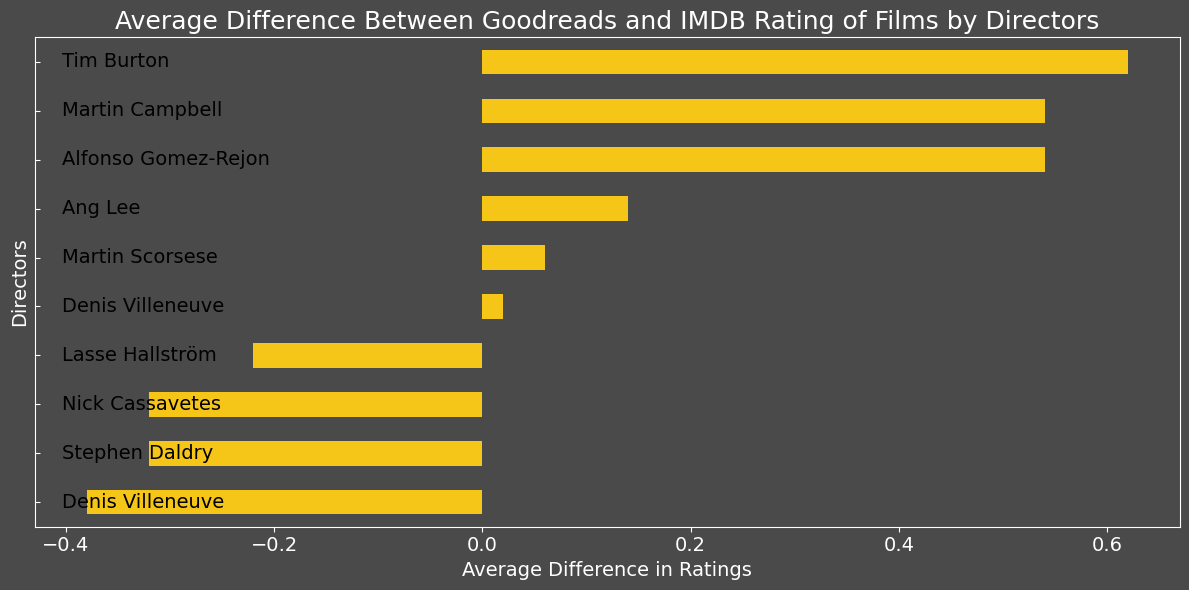

In [203]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
small_list.sort_values(by=['imdb_book_diff'], ascending=False).head(10)[::-1].plot(x='Director', y='imdb_book_diff', kind = 'barh', color = color_palette['imdb'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average Difference Between Goodreads and IMDB Rating of Films by Directors', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('Average Difference in Ratings', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Directors', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=-20, direction='in', color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();

In [147]:
Author_count = small_list.groupby('Author', as_index=False).Film_Title.count().sort_values(by=['Film_Title'], ascending=False)
Author_count

,Author,Film_Title
76,Stephen King,7
57,Nicholas Sparks,5
78,Suzanne Collins,5
51,Michael Crichton,4
77,Stephenie Meyer,4
...,...,...
80,Thornton Wilder,1
81,Tom Clancy,1
82,Tracy Chevalier,1
83,W. Somerset Maugham,1


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3966040685.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


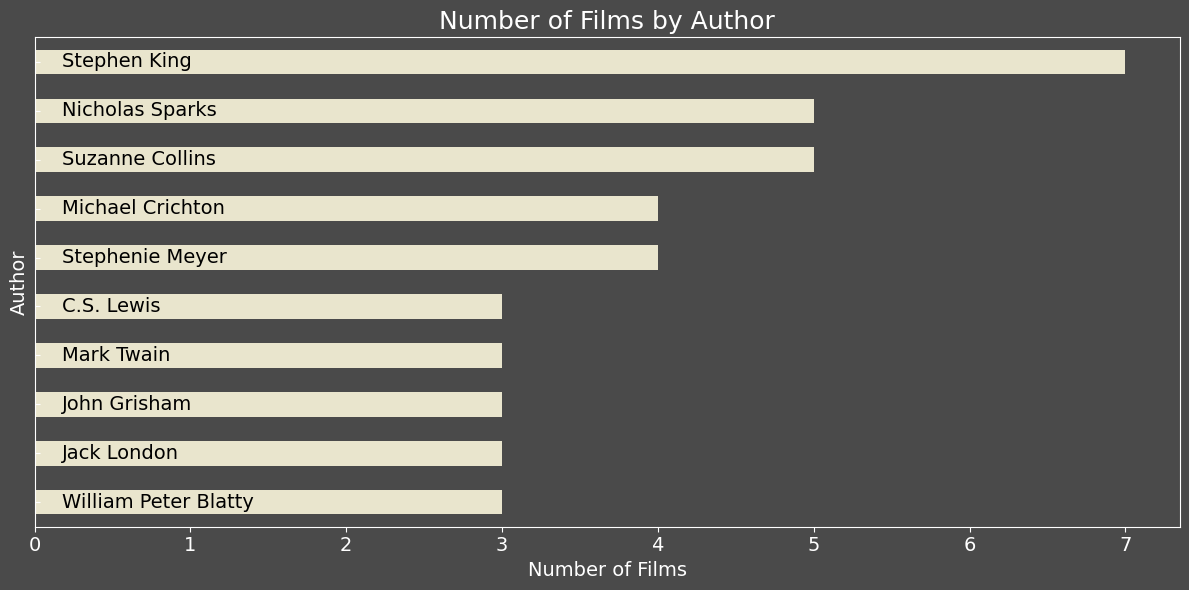

In [193]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
Author_count.head(10)[::-1].plot(x='Author', y='Film_Title', kind = 'barh', color = color_palette['goodreads'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Number of Films by Author', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('Number of Films', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Author', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=-20, direction='in', color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Number_of_Films_by_Author.png", dpi=300, bbox_inches='tight')

In [152]:
Author_book = small_list.groupby('Author', as_index=False).average_rating.mean().sort_values(by=['average_rating'], ascending=False)
Author_book.average_rating = Author_book.average_rating*2
Author_book

,Author,average_rating
44,Kathryn Stockett,8.90
78,Suzanne Collins,8.68
34,Jane Austen,8.48
71,Rick Riordan,8.46
11,C.S. Lewis,8.38
...,...,...
37,Jesse Andrews,7.16
36,Jean Rhys,7.12
55,Myla Goldberg,7.10
6,Anne Tyler,7.02


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\1481801157.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


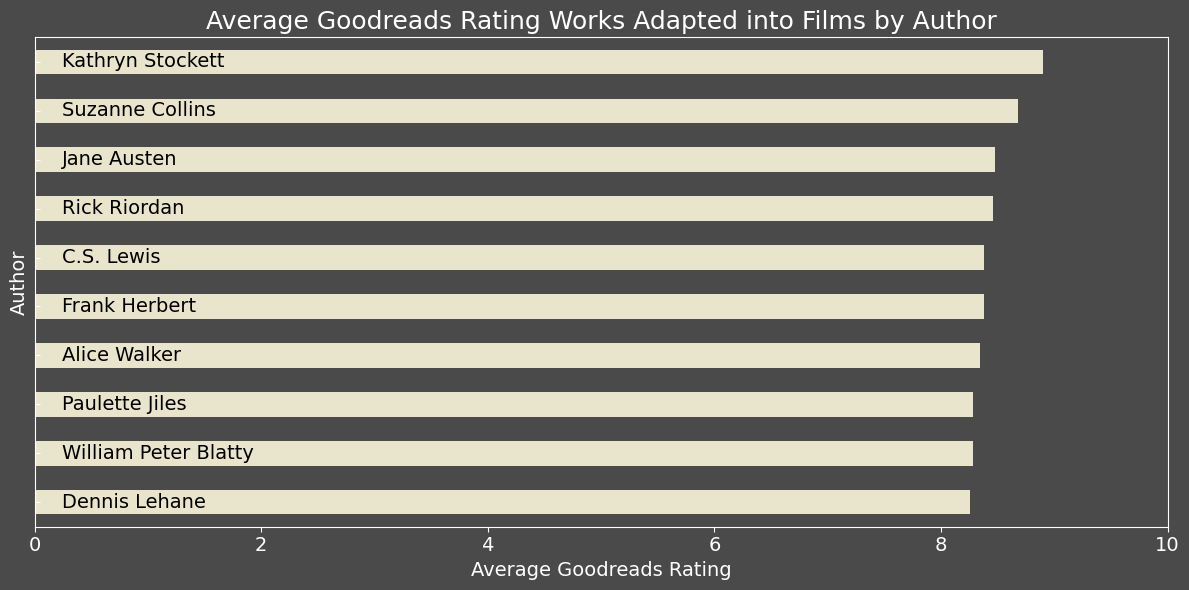

In [192]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
Author_book.head(10)[::-1].plot(x='Author', y='average_rating', kind = 'barh', color = color_palette['goodreads'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average Goodreads Rating Works Adapted into Films by Author', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
ax.set_xlim(0, 10)
plt.xlabel('Average Goodreads Rating', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Author', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=-20, direction='in', color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_Goodreads_Rating_Works_Adapted_into_Films_by_Author.png", dpi=300, bbox_inches='tight')

In [154]:
Author_imdb = small_list.groupby('Author', as_index=False).imdb_rating.mean().sort_values(by=['imdb_rating'], ascending=False)
Author_imdb

,Author,imdb_rating
25,Frank Herbert,8.20
44,Kathryn Stockett,8.10
20,Dennis Lehane,8.05
27,Ian Fleming,8.00
17,Daniel Wallace,7.90
...,...,...
84,William Peter Blatty,5.00
66,Ray Bradbury,5.00
47,Madeleine L'Engle,4.95
8,Arthur Conan Doyle,2.50


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\1495677895.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


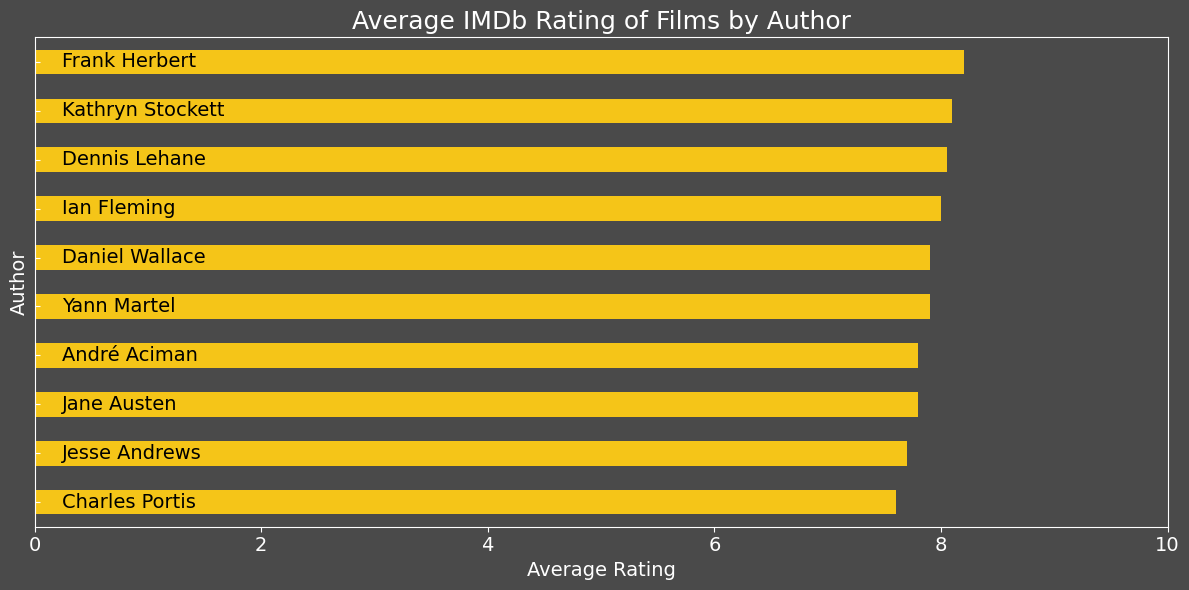

In [235]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
Author_imdb.head(10)[::-1].plot(x='Author', y='imdb_rating', kind = 'barh', color = color_palette['imdb'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average IMDb Rating of Films by Author', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
ax.set_xlim(0, 10)
plt.xlabel('Average Rating', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Author', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='left', va='center', fontsize = 14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=-20, direction='in', color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_IMDB_Rating_of_Films_by_Authors.png", dpi=300, bbox_inches='tight')

In [156]:
Author_diff = small_list.groupby('Author', as_index=False).imdb_book_diff.mean().sort_values(by=['imdb_book_diff'], ascending=False)
Author_diff

,Author,imdb_book_diff
17,Daniel Wallace,0.62
37,Jesse Andrews,0.54
27,Ian Fleming,0.54
85,Yann Martel,0.14
25,Frank Herbert,-0.18
...,...,...
66,Ray Bradbury,-2.94
47,Madeleine L'Engle,-3.13
84,William Peter Blatty,-3.28
8,Arthur Conan Doyle,-5.34


C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3076778382.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


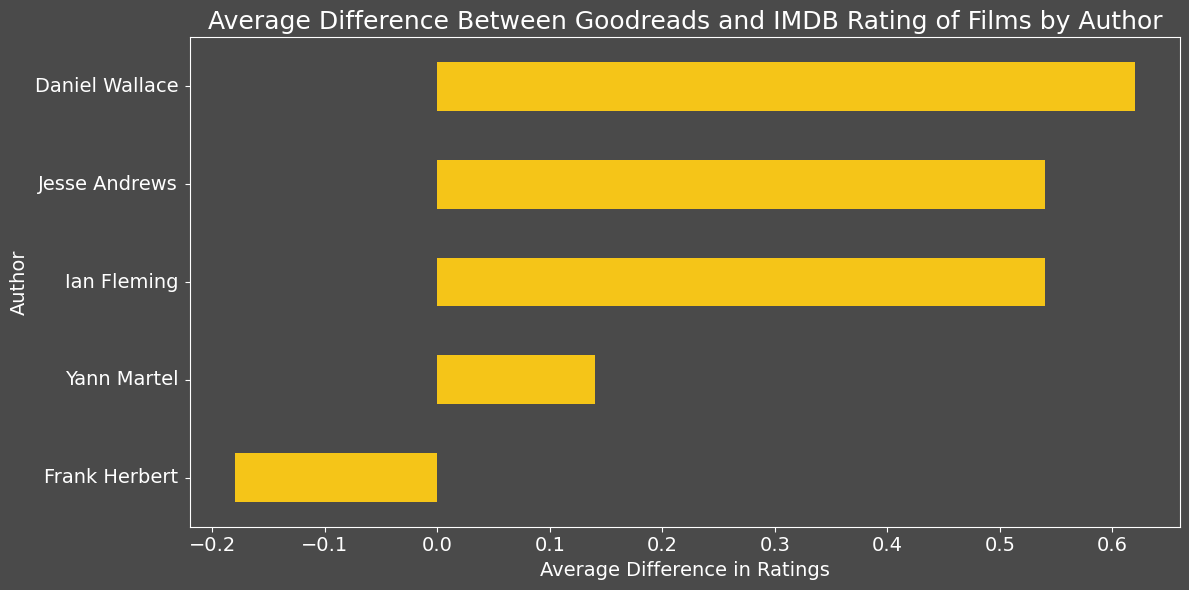

In [196]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
Author_diff.head(5)[::-1].plot(x='Author', y='imdb_book_diff', kind = 'barh', color = color_palette['imdb'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Average Difference Between Goodreads and IMDB Rating of Films by Author', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('Average Difference in Ratings', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Author', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14, color =  color_palette['lines'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Average_Difference_Between_Goodreads_and_IMDB_Rating_of_Films_by_Authors.png", dpi=300, bbox_inches='tight')

C:\Users\erics\AppData\Local\Temp\ipykernel_33712\1907746526.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


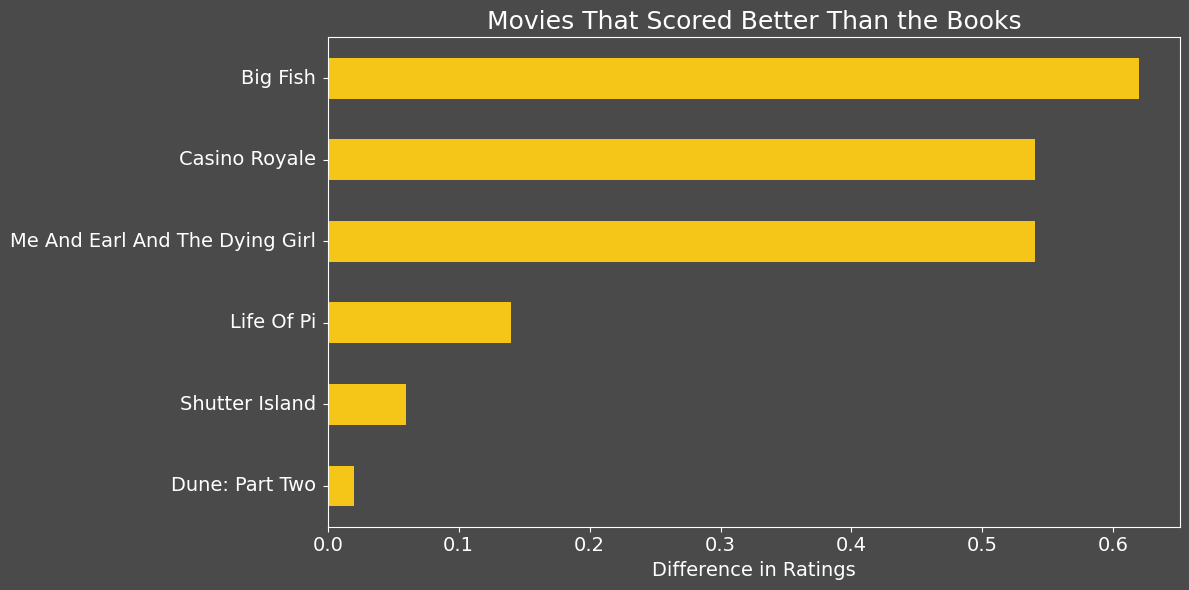

In [218]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
small_list.sort_values(by=['imdb_book_diff'], ascending=False).head(6)[::-1].plot(x='Film_Title', y='imdb_book_diff', kind = 'barh', color = color_palette['imdb'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Movies That Scored Better Than the Books', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('Difference in Ratings', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14, color =  color_palette['lines'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();

plt.savefig("../images/Movies That Scored Better Than the Books.png", dpi=300, bbox_inches='tight')

In [210]:
small_list.sort_values(by=['imdb_book_diff'], ascending=False).head(10)

,Book_Title_Cleaned,Author,Publication_Date,average_rating,Film_Title,Director,Release_Date,imdb_rating,metacritic_rating,budget,budget_currency,world_wide_gross,currency,time_to_adapt,imdb_book_diff,metacritic_book_diff
25,Big Fish: A Novel Of Mythic Proportions,Daniel Wallace,1998,3.64,Big Fish,Tim Burton,2003,7.9,58.0,70000000.0,$,122936053.0,$,5,0.62,-1.48
42,Casino Royale,Ian Fleming,1953,3.73,Casino Royale,Martin Campbell,2006,8.0,80.0,150000000.0,$,616585752.0,$,53,0.54,0.54
117,Me And Earl And The Dying Girl,Jesse Andrews,2012,3.58,Me And Earl And The Dying Girl,Alfonso Gomez-Rejon,2015,7.7,74.0,8000000.0,$,9074749.0,$,3,0.54,0.24
61,Life Of Pi,Yann Martel,2001,3.88,Life Of Pi,Ang Lee,2012,7.9,79.0,120000000.0,$,609016565.0,$,11,0.14,0.14
82,Shutter Island,Dennis Lehane,2003,4.07,Shutter Island,Martin Scorsese,2010,8.2,63.0,80000000.0,$,294978537.0,$,7,0.06,-1.84
102,Dune,Frank Herbert,1965,4.19,Dune: Part Two,Denis Villeneuve,2024,8.4,79.0,190000000.0,$,714844358.0,$,59,0.02,-0.48
98,Salmon Fishing In The Yemen,Paul Torday,2006,3.51,Salmon Fishing In The Yemen,Lasse Hallström,2011,6.8,58.0,NaN,NaN,34564651.0,$,5,-0.22,-1.22
30,The Notebook,Nicholas Sparks,1996,4.06,The Notebook,Nick Cassavetes,2004,7.8,53.0,29000000.0,$,118561492.0,$,8,-0.32,-2.82
11,The Hours,Michael Cunningham,1998,3.91,The Hours,Stephen Daldry,2002,7.5,80.0,25000000.0,$,108846217.0,$,4,-0.32,0.18
83,Dune,Frank Herbert,1965,4.19,Dune: Part One,Denis Villeneuve,2021,8.0,74.0,165000000.0,$,410668500.0,$,56,-0.38,-0.98


In [164]:
small_list.corr(numeric_only = True)

,Publication_Date,average_rating,Release_Date,imdb_rating,metacritic_rating,budget,world_wide_gross,time_to_adapt,imdb_book_diff,metacritic_book_diff
Publication_Date,1.000000,-0.052202,-0.115538,0.224976,0.011237,-0.133760,0.061919,-0.987458,0.253398,0.026493
average_rating,-0.052202,1.000000,0.271252,0.281645,0.254426,0.261012,0.168755,0.093702,-0.131731,-0.006324
Release_Date,-0.115538,0.271252,1.000000,-0.020755,0.098131,0.273810,0.222754,0.270912,-0.132909,0.031700
imdb_rating,0.224976,0.281645,-0.020755,1.000000,0.718706,0.170962,0.205613,-0.221426,0.914056,0.655547
metacritic_rating,0.011237,0.254426,0.098131,0.718706,1.000000,0.091494,0.215790,0.005531,0.636960,0.965464
budget,-0.133760,0.261012,0.273810,0.170962,0.091494,1.000000,0.680801,0.176848,0.068255,0.031037
world_wide_gross,0.061919,0.168755,0.222754,0.205613,0.215790,0.680801,1.000000,-0.023804,0.138389,0.178155
time_to_adapt,-0.987458,0.093702,0.270912,-0.221426,0.005531,0.176848,-0.023804,1.000000,-0.266737,-0.020352
imdb_book_diff,0.253398,-0.131731,-0.132909,0.914056,0.636960,0.068255,0.138389,-0.266737,1.000000,0.691087
metacritic_book_diff,0.026493,-0.006324,0.031700,0.655547,0.965464,0.031037,0.178155,-0.020352,0.691087,1.000000


In [169]:
small_list[['Publication_Date', 'time_to_adapt']].corr(numeric_only = True)

,Publication_Date,time_to_adapt
Publication_Date,1.000000,-0.987458
time_to_adapt,-0.987458,1.000000


In [173]:
Publication_Date_time_to_adapt = small_list[['Publication_Date', 'time_to_adapt']]

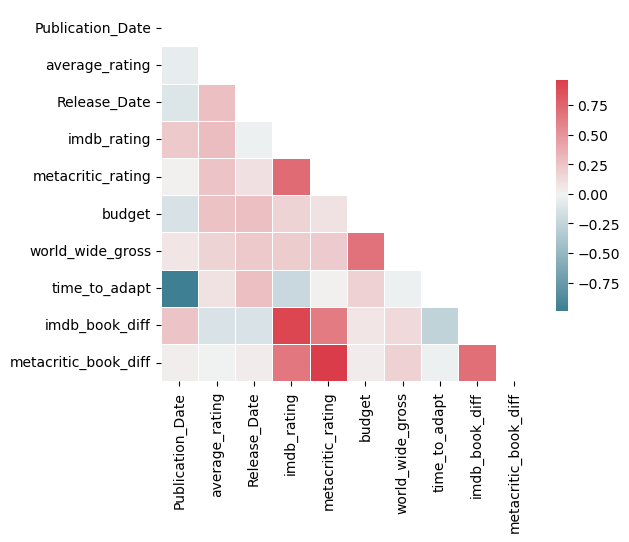

In [167]:
fig, ax = plt.subplots(figsize=(6, 6))

corr = small_list.corr(numeric_only = True)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, mask = mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3340373637.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14, color =  color_palette['lines'])
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\3340373637.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


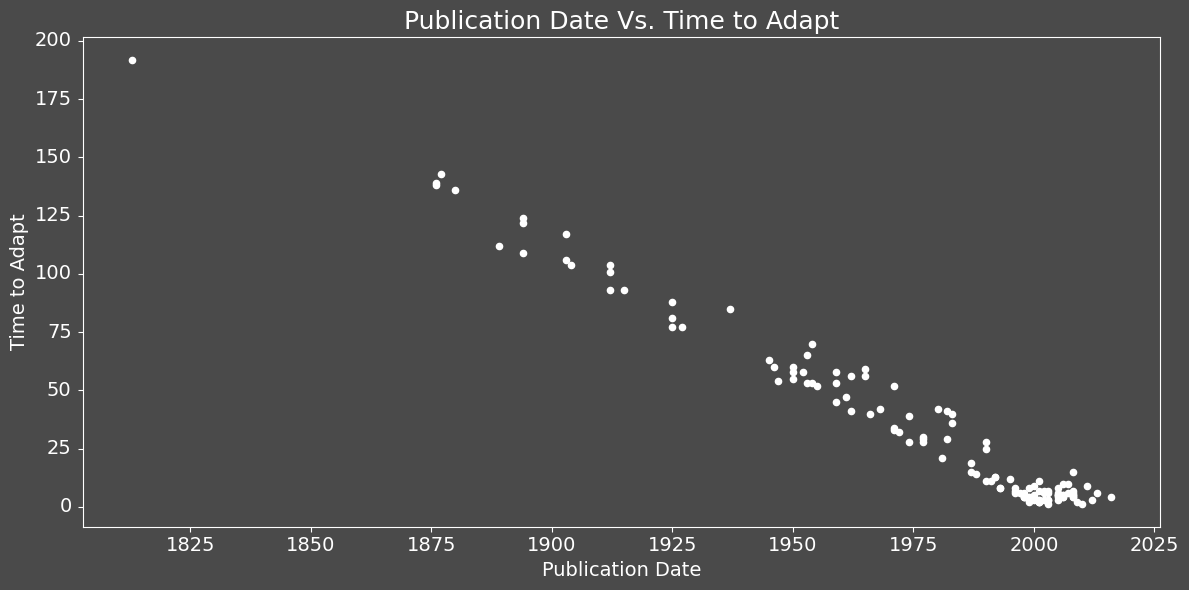

In [176]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
Publication_Date_time_to_adapt[::-1].plot(x='Publication_Date', y='time_to_adapt', kind = 'scatter', color = color_palette['lines'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Publication Date Vs. Time to Adapt', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('Publication Date', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Time to Adapt', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14, color =  color_palette['lines'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();

In [177]:
Publication_Date_time_to_adapt[Publication_Date_time_to_adapt.Publication_Date >= 1900]

,Publication_Date,time_to_adapt
0,1993,8
1,1997,6
2,1990,11
3,1991,11
4,1993,8
...,...,...
126,2016,4
127,1959,58
128,2011,9
129,1903,117


In [178]:
Publication_Date_time_to_adapt = Publication_Date_time_to_adapt[Publication_Date_time_to_adapt.Publication_Date >= 1900]

C:\Users\erics\AppData\Local\Temp\ipykernel_33712\2382735346.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14, color =  color_palette['lines'])
C:\Users\erics\AppData\Local\Temp\ipykernel_33712\2382735346.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)


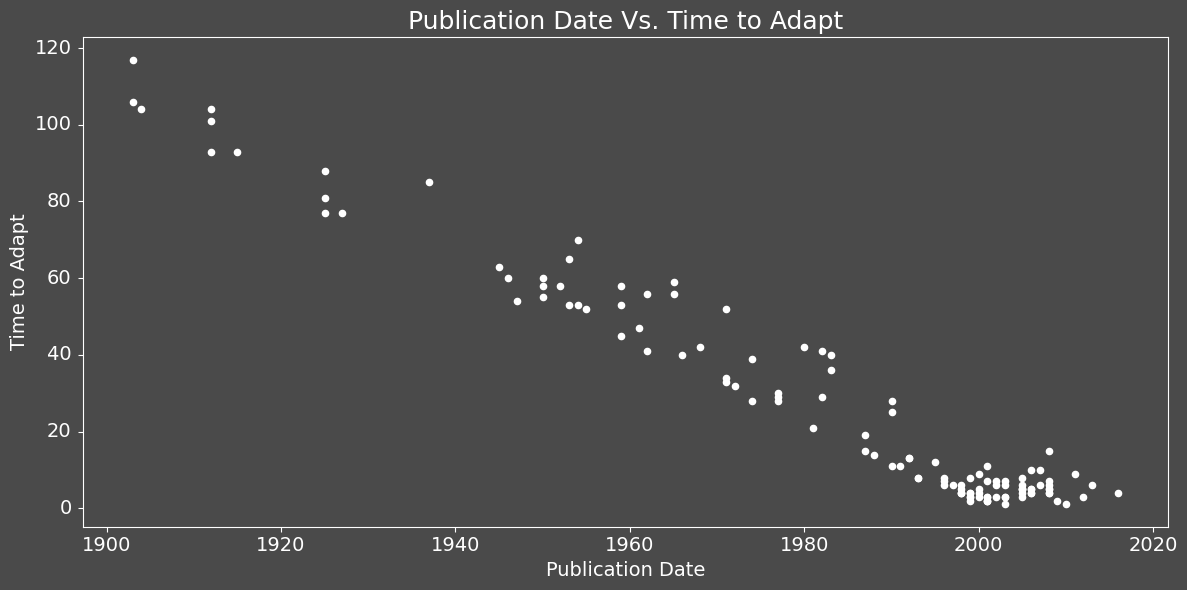

In [199]:
fig, ax = plt.subplots()
fig.patch.set_facecolor(color_palette['background'])
Publication_Date_time_to_adapt[::-1].plot(x='Publication_Date', y='time_to_adapt', kind = 'scatter', color = color_palette['lines'], figsize=(12, 6), legend=False, ax=ax)
plt.title('Publication Date Vs. Time to Adapt', fontsize = 18, color =  color_palette['lines'])
ax.set_facecolor(color_palette['background'])
plt.xlabel('Publication Date', color =  color_palette['lines'], fontsize = 14)
plt.ylabel('Time to Adapt', color =  color_palette['lines'], fontsize = 14)
ax.spines[["bottom","left","top","right"]].set_color(color_palette['lines'])
ax.set_yticklabels(ax.get_yticklabels(), ha='right', va='center', fontsize = 14, color =  color_palette['lines'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14)
ax.tick_params(axis='y', pad=5, color =  color_palette['lines'])
ax.tick_params(axis='x', color =  color_palette['lines'], labelcolor=color_palette['lines'])
plt.tight_layout();
plt.savefig("../images/Publication_Date_Vs_Time_to_Adapt.png", dpi=300, bbox_inches='tight')

In [180]:
Publication_Date_time_to_adapt.corr(numeric_only = True)

,Publication_Date,time_to_adapt
Publication_Date,1.000000,-0.977316
time_to_adapt,-0.977316,1.000000


In [220]:
small_list[small_list.Director == 'Francis Lawrence']

,Book_Title_Cleaned,Author,Publication_Date,average_rating,Film_Title,Director,Release_Date,imdb_rating,metacritic_rating,budget,budget_currency,world_wide_gross,currency,time_to_adapt,imdb_book_diff,metacritic_book_diff
65,I Am Legend,Richard Matheson,1954,4.07,I Am Legend,Francis Lawrence,2007,7.2,65.0,150000000.0,$,585498742.0,$,53,-0.94,-1.64
79,The Hunger Games,Suzanne Collins,2008,4.34,The Hunger Games: The Ballad Of Songbirds & Sn...,Francis Lawrence,2023,6.6,54.0,100000000.0,$,361791134.0,$,15,-2.08,-3.28
80,Water For Elephants,Sara Gruen,2006,4.07,Water For Elephants,Francis Lawrence,2011,6.9,52.0,38000000.0,$,117094902.0,$,5,-1.24,-2.94
111,The Hunger Games,Suzanne Collins,2008,4.34,The Hunger Games: Catching Fire,Francis Lawrence,2013,7.5,76.0,130000000.0,$,865011746.0,$,5,-1.18,-1.08
112,The Hunger Games,Suzanne Collins,2008,4.34,The Hunger Games: Mockingjay - Part 1,Francis Lawrence,2014,6.6,64.0,125000000.0,$,758846335.0,$,6,-2.08,-2.28
113,The Hunger Games,Suzanne Collins,2008,4.34,The Hunger Games: Mockingjay - Part 2,Francis Lawrence,2015,6.6,65.0,160000000.0,$,664905155.0,$,7,-2.08,-2.18


In [221]:
small_list[small_list.Author == 'Stephen King']

,Book_Title_Cleaned,Author,Publication_Date,average_rating,Film_Title,Director,Release_Date,imdb_rating,metacritic_rating,budget,budget_currency,world_wide_gross,currency,time_to_adapt,imdb_book_diff,metacritic_book_diff
26,Carrie,Stephen King,1974,3.93,Carrie,David Carson,2002,5.4,NaN,NaN,NaN,NaN,NaN,28,-2.46,NaN
68,Cell,Stephen King,2006,3.64,Cell,Tod Williams,2016,4.5,38.0,NaN,NaN,1323012.0,$,10,-2.78,-3.48
72,Pet Sematary,Stephen King,1983,3.91,Pet Sematary,Kevin Kölsch,2019,5.7,57.0,21000000.0,$,113118226.0,$,36,-2.12,-2.12
97,Pet Sematary,Stephen King,1983,3.91,Pet Sematary: Bloodlines,Lindsey Anderson Beer,2023,4.6,31.0,20000000.0,$,NaN,NaN,40,-3.22,-4.72
108,Firestarter,Stephen King,1980,3.85,Firestarter,Keith Thomas,2022,4.6,32.0,12000000.0,$,15039250.0,$,42,-3.10,-4.50
110,Carrie,Stephen King,1974,3.93,Carrie,Kimberly Peirce,2013,5.8,53.0,30000000.0,$,84790678.0,$,39,-2.06,-2.56
124,Doctor Sleep,Stephen King,2013,4.10,Doctor Sleep,Mike Flanagan,2019,7.3,59.0,45000000.0,$,72385286.0,$,6,-0.90,-2.30
